In [18]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [19]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [97]:
gals = ['s39170','n21156','s40862','s44042']
mp = [0.019,0.015]
ap = [4.5,3.0]
m_mn,mnc_mn,mdf3_mn,mdf2_mn,mdf1_mn = [[],[],[],[],[]]
a_mn,anc_mn,adf3_mn,adf2_mn,adf1_mn = [[],[],[],[],[]]

m_sd,mnc_sd,mdf3_sd,mdf2_sd,mdf1_sd = [[],[],[],[],[]]
a_sd,anc_sd,adf3_sd,adf2_sd,adf1_sd = [[],[],[],[],[]]

for i in range(len(gals)):
    for ii in range(len(mp)):
        print '../mcerr/%s_m%s_a%s.npy' % (gals[i],mp[ii],ap[ii])
        m,a = np.load('../mcerr/%s_m%s_a%s.npy' % (gals[i],mp[ii],ap[ii]))
        mnc,anc = np.load('../mcerr/%s_m%s_a%sNC.npy' % (gals[i],mp[ii],ap[ii]))
        mdf3,adf3 = np.load('../mcerr/%s_m%s_a%sDF3d.npy' % (gals[i],mp[ii],ap[ii]))
        mdf2,adf2 = np.load('../mcerr/%s_m%s_a%sDF2d.npy' % (gals[i],mp[ii],ap[ii]))
        mdf1,adf1 = np.load('../mcerr/%s_m%s_a%sDF1d.npy' % (gals[i],mp[ii],ap[ii]))
        ##
        m_mn.append(np.mean(m) - mp[ii])
        mnc_mn.append(np.mean(mnc) - mp[ii])
        mdf3_mn.append(np.mean(mdf3) - mp[ii])
        mdf2_mn.append(np.mean(mdf2) - mp[ii])
        mdf1_mn.append(np.mean(mdf1) - mp[ii])
        a_mn.append(np.mean(a) - ap[ii])
        anc_mn.append(np.mean(anc) - ap[ii])
        adf3_mn.append(np.mean(adf3) - ap[ii])
        adf2_mn.append(np.mean(adf2) - ap[ii])
        adf1_mn.append(np.mean(adf1) - ap[ii])
        ##
        m_sd.append(np.std(m))
        mnc_sd.append(np.std(mnc))
        mdf3_sd.append(np.std(mdf3))
        mdf2_sd.append(np.std(mdf2))
        mdf1_sd.append(np.std(mdf1))
        a_sd.append(np.std(a))
        anc_sd.append(np.std(anc))
        adf3_sd.append(np.std(adf3))
        adf2_sd.append(np.std(adf2))
        adf1_sd.append(np.std(adf1))

../mcerr/s39170_m0.019_a4.5.npy
../mcerr/s39170_m0.015_a3.0.npy
../mcerr/n21156_m0.019_a4.5.npy
../mcerr/n21156_m0.015_a3.0.npy
../mcerr/s40862_m0.019_a4.5.npy
../mcerr/s40862_m0.015_a3.0.npy
../mcerr/s44042_m0.019_a4.5.npy
../mcerr/s44042_m0.015_a3.0.npy


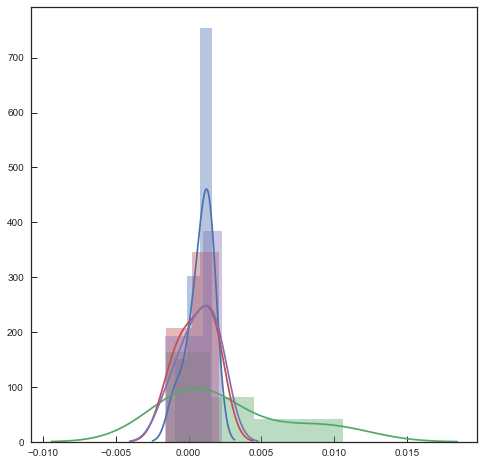

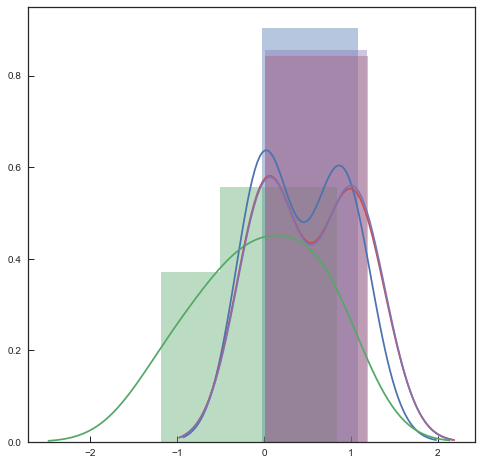

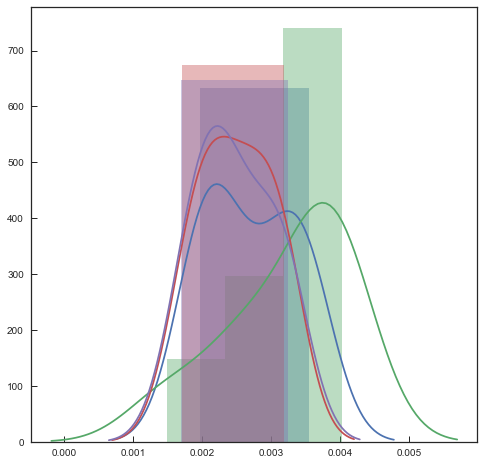

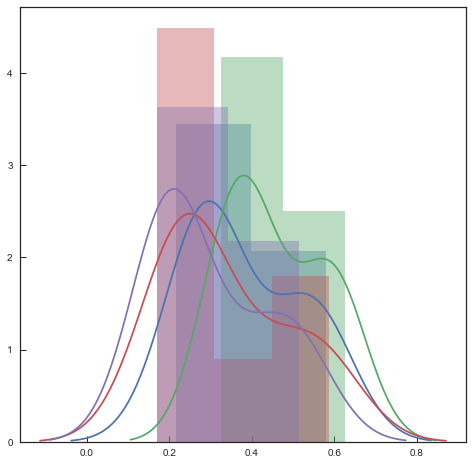

In [100]:
plt.figure(figsize=[8,8])
sea.distplot(m_mn)
sea.distplot(mnc_mn)
sea.distplot(mdf2_mn)
sea.distplot(mdf1_mn)
plt.show()
plt.close()

plt.figure(figsize=[8,8])
sea.distplot(a_mn)
sea.distplot(anc_mn)
sea.distplot(adf2_mn)
sea.distplot(adf1_mn)
plt.show()
plt.close()

plt.figure(figsize=[8,8])
sea.distplot(m_sd)
sea.distplot(mnc_sd)
sea.distplot(mdf2_sd)
sea.distplot(mdf1_sd)
plt.show()
plt.close()

plt.figure(figsize=[8,8])
sea.distplot(a_sd)
sea.distplot(anc_sd)
sea.distplot(adf2_sd)
sea.distplot(adf1_sd)
plt.show()
plt.close()

In [21]:
def Plot_2d(metal_list, age_list, true_m, true_a, title):
    plt.figure(figsize=[8,8])
    sea.kdeplot(metal_list, age_list)
    plt.scatter(metal_list, age_list, marker='o')
    plt.title(title)
    plt.scatter(true_m, true_a,color='r')
    plt.axis([0,0.03,0,6])
    plt.show()
    plt.close()

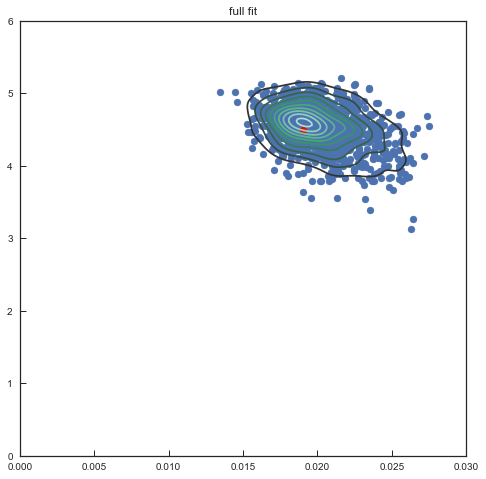

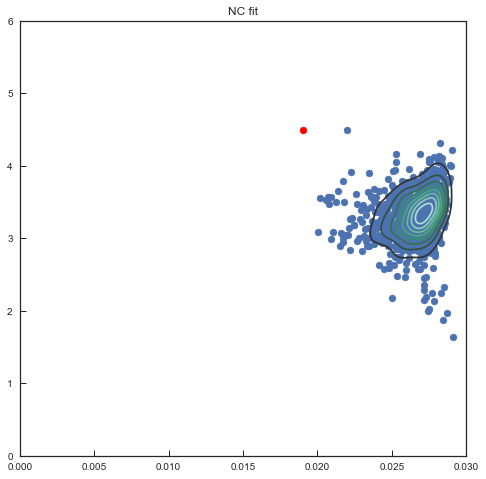

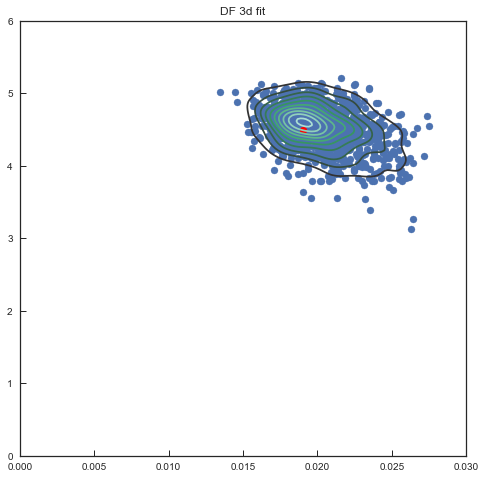

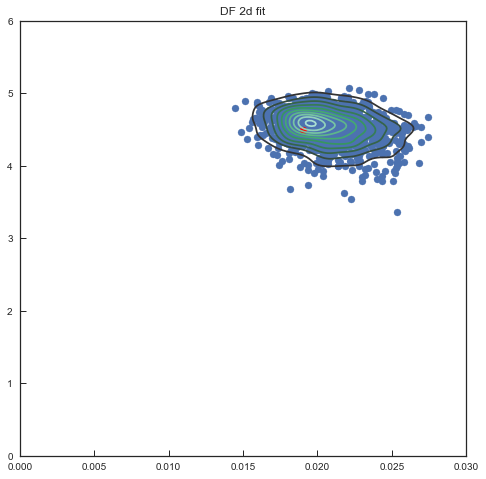

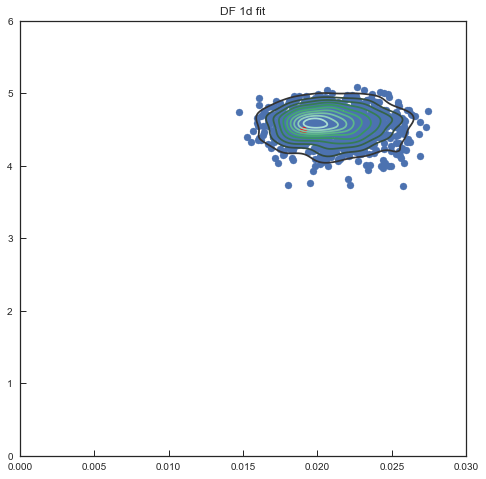

In [65]:
%matplotlib inline
Plot_2d(m,a,0.019,4.5,'full fit')
Plot_2d(mnc,anc,0.019,4.5,'NC fit')
Plot_2d(mdf3,adf3,0.019,4.5,'DF 3d fit')
Plot_2d(mdf2,adf2,0.019,4.5,'DF 2d fit')
Plot_2d(mdf1,adf1,0.019,4.5,'DF 1d fit')

In [69]:
print np.mean(m)
print np.mean(mnc)
print np.mean(mdf3)
print np.mean(mdf2)
print np.mean(mdf1)
print np.mean(a)
print np.mean(anc)
print np.mean(adf3)
print np.mean(adf2)
print np.mean(adf1)

0.0202061162325
0.0265150380762
0.0202061162325
0.0207490581162
0.0209481442886
4.51351202405
3.31638577154
4.51351202405
4.51225551102
4.55577054108


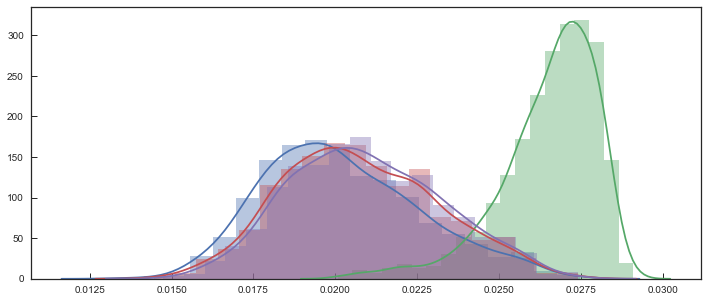

In [67]:
plt.figure(figsize=[12,5])
sea.distplot(m,20)
sea.distplot(mnc,20)
# sea.distplot(mdf3,20)
sea.distplot(mdf2,20)
sea.distplot(mdf1,20)
plt.show()
plt.close()

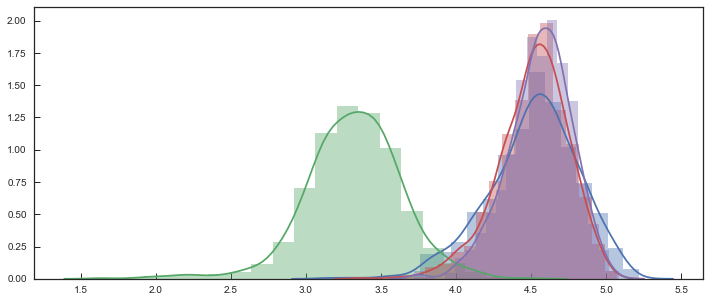

In [68]:
plt.figure(figsize=[12,5])
sea.distplot(a,20)
sea.distplot(anc,20)
# sea.distplot(adf3,20)
sea.distplot(adf2,20)
sea.distplot(adf1,20)
plt.show()
plt.close()